<center> <h1> AMAZON REVIEWS - SENTIMENT ANALYSIS </h2> </center>

Data Set Link : https://www.kaggle.com/datasets/bittlingmayer/amazonreviews

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score , roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import re
import bz2

Dataset is in the format first is label and next is text

<b> EXAMPLE DATA </b>

__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"

Here label number is at 9th position and also here the format is label has values from 1 and 2 so by subtracting them by 1 we make it as 0 and 1 and then from 10th index the review begins

In [3]:
def getlabelandtext(file):
    labels = []
    texts = []
    for line in bz2.BZ2File(file):
        # let's decode line by line
        x = line.decode("utf-8")
        labels.append(int(x[9]) - 1)
        texts.append(x[10:].strip())
    return np.array(labels), texts
train_labels, train_texts = getlabelandtext("C:\\Users\\viswa\\Data Science and ML\\Datasets\\Amazon Reviews Dataset\\train.ft.txt.bz2")
test_labels, test_texts = getlabelandtext("C:\\Users\\viswa\Data Science and ML\\Datasets\\Amazon Reviews Dataset\\test.ft.txt.bz2")

In [4]:
train_labels[0]

1

In [5]:
train_texts[0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [6]:
train_labels=train_labels[0:500]
train_texts=train_texts[0:500]

In [7]:
#text pre-processing
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower()
        no_punctuation = NON_ALPHANUM.sub(r' ', lower)
        no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
        normalized_texts.append(no_non_ascii)
    return normalized_texts 

In [8]:
train_texts = normalize(train_texts)
test_texts = normalize(test_texts)

In [9]:
train_texts[0]

'stuning even for the non gamer  this sound track was beautiful  it paints the senery in your mind so well i would recomend it even to people who hate vid  game music  i have played the game chrono cross but out of all of the games i have ever played it has the best music  it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras  it would impress anyone who cares to listen    '

<hr/><b>We need to convert this text into numerical format using count vector</b>

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(train_texts)
#we don't fit test set as they are already in numerical format and there is no much deviations in the data
X = cv.transform(train_texts)
X_test = cv.transform(test_texts)

In [11]:
X_test

<400000x5778 sparse matrix of type '<class 'numpy.int64'>'
	with 18647020 stored elements in Compressed Sparse Row format>

In [12]:
print(X_test)

  (0, 213)	1
  (0, 282)	1
  (0, 398)	1
  (0, 503)	1
  (0, 506)	1
  (0, 511)	1
  (0, 525)	1
  (0, 561)	1
  (0, 761)	1
  (0, 1305)	1
  (0, 1698)	1
  (0, 1701)	1
  (0, 1857)	1
  (0, 1864)	1
  (0, 1973)	1
  (0, 2090)	1
  (0, 2156)	1
  (0, 2193)	1
  (0, 2279)	1
  (0, 2288)	1
  (0, 2331)	1
  (0, 2525)	1
  (0, 2678)	1
  (0, 2681)	1
  (0, 2689)	1
  :	:
  (399999, 3817)	1
  (399999, 3987)	1
  (399999, 4059)	1
  (399999, 4194)	1
  (399999, 4363)	1
  (399999, 4413)	1
  (399999, 4667)	1
  (399999, 4773)	1
  (399999, 4888)	1
  (399999, 5087)	1
  (399999, 5090)	1
  (399999, 5094)	1
  (399999, 5100)	1
  (399999, 5104)	1
  (399999, 5107)	1
  (399999, 5125)	1
  (399999, 5186)	1
  (399999, 5191)	1
  (399999, 5455)	1
  (399999, 5540)	1
  (399999, 5609)	1
  (399999, 5610)	1
  (399999, 5620)	1
  (399999, 5649)	1
  (399999, 5759)	1


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# X_train, X_val, y_train, y_val = train_test_split(
#     X, train_labels, train_size = 0.75
# )
# this is done when we are provided with test data separately

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X, train_labels)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(test_labels, lr.predict(X_test))))

Accuracy for C=0.01: 0.738915
Accuracy for C=0.05: 0.753645
Accuracy for C=0.25: 0.7520925
Accuracy for C=0.5: 0.7495375
Accuracy for C=1: 0.7469675


We can see that at c=0.05 we have high accuracy with the use of c we can regularize the data and prevent it from overfitting

<b>Correct Prediction</b>

In [15]:
lr.predict(X_test[24])

array([0])

In [16]:
test_labels[24]

0

In [17]:
test_texts[24]

'don t take the chance   get the se branded cable  if you purchase this data cable  you need to know that you will receive no real directions or information regarding what to check if nothing works  as directed  i downloaded all of the files from the se site  0mb on dial up    and then downloaded all of the user guides  everything seemed to install ok  but nothing would make my phone be recognized  after that i scoured the se site for troubleshooting info on their branded cable in the hope that something would help me figure out the problem  after  full days of beating my head against the wall  i finally threw the cable and the useless cd that came with it in the trash if i had used my brain i would have paid the extra    for a se branded cable and software  and the support that comes along with that   i now have the real deal  se data cable and software   and guess what  yep  installation was a breeze and it works beautifully  you really do get what you pay for '

<b> Mixed Review Prediction </b>

In [18]:
lr.predict(X_test[20])

array([1])

In [19]:
test_labels[20]

0

In [20]:
test_texts[20]

'long and boring  i ve read this book with much expectation  it was very boring all through out the book'

In [31]:
pred=lr.predict(X_test)

In [32]:
pred

array([1, 1, 0, ..., 0, 1, 0])

In [36]:
x=np.arange(0,400000)

In [37]:
x

array([     0,      1,      2, ..., 399997, 399998, 399999])

<b> PLOT </b> <br/>
The concept of label here is not to mention test value or predicted value if both are same
Orange marker will replace blue so whereever only blue is there it means there is some wrong prediction over there

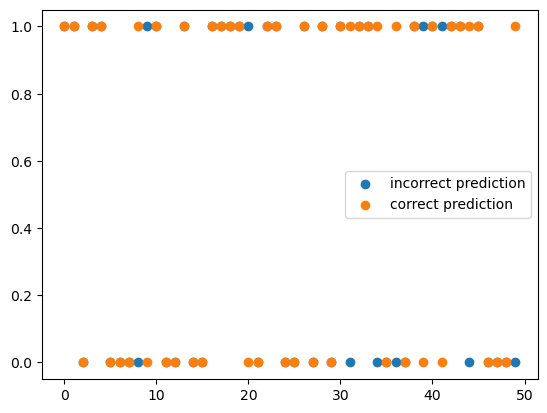

In [51]:
plt.scatter(x[0:50],pred[0:50],label="incorrect prediction")
plt.scatter(x[0:50],test_labels[0:50],label="correct prediction")
plt.legend()

Here we have just used linear regression model and have predicted it but in future my plan is to create my own model which will analyse the words properly and provide you with more than two options of emotions